Hello!
I'm happy to review your project today.
When I will see mistake at the first time, I will just point it out. I let you find it and fix it by 
yourself. I'm trying to prepare you to work as an Data Analyst. SO, at a real job, your team lead 
will do the same. But if you can't handle this task yet, I will give you a more accurate hint at the 
next iteration.
You will find my comments below - please do not move, modify or delete them.
You can find my comments in green, yellow or red boxes like this:
<div class="alert alert-block alert-success"> <b>Reviewer's comment</b> <a 
class="tocSkip"></a>
Success. Everything is done succesfully. </div>
<div class="alert alert-block alert-warning"> <b>Reviewer's comment</b> <a 
class="tocSkip"></a>
Remarks. Some recommendations. </div>
<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
Needs fixing. The block requires some corrections. Work can't be accepted with the red 
comments. </div>
You can answer me by using this:
<div class="alert alert-block alert-info"> <b>Student answer.</b> <a class="tocSkip"></a> 
</div>

<div class="alert alert-block alert-success">
    
<b>**General feedback**</b> <a class="tocSkip"></a>
    
Hi, Amanda
    
I am happy to review your project today
    


<div class="alert alert-block alert-danger">
<b></b> <a class="tocSkip"></a>
We have an issue with Kcode Please use file paths from the brief To make sure that all code runs Kernel -> Restart & Run All</div>
    
Waiting for a new version

<div class="alert alert-block alert-success">
    
<b>**General feedback**</b> <a class="tocSkip"></a>
    
Hi, Amanda
    
Thank you for correcting file paths
    
There are many things that I like
    
- perfect progect structure
- almost all calculations are correct
- amazing visualizations
- you completed all necessary tasks
    


<div class="alert alert-block alert-danger">
<b></b> <a class="tocSkip"></a>
There is just one tiny issue Please fix red comment</div>
    
One more time and you will have it

<div class="alert alert-block alert-success">
    
<b>**General feedback v2**</b> <a class="tocSkip"></a>
    
Hi, Amanda
    
Thank you for your correction
    
Now your project is perfect
    
I am happy to say that your project has been accepted
    
Keep up good work and good luck in the next sprint

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
~~Please add project title and short project description~~ </div>

# Project Title: Exploratory Data Analysis of Instacart Customer Orders

# Project Description:  This project involves performing exploratory data analysis (EDA) on a dataset from Instacart, a grocery delivery platform. The goal is to clean the data, analyze customer shopping habits, and present insights through visualizations. This analysis will cover customer order patterns, time-based ordering behavior, and product reorder tendencies, helping to understand Instacart's customer base better.

<div class="alert alert-block alert-warning"> <b>Reviewer's comment</b> <a 
class="tocSkip"></a>
It is better to write a text in markdown cell </div>

In [1]:
import pandas as pd

In [2]:
orders = pd.read_csv('/datasets/instacart_orders.csv', delimiter=';')

In [3]:
products = pd.read_csv('/datasets/products.csv', delimiter=';')

In [4]:
order_products = pd.read_csv('/datasets/order_products.csv', delimiter=';')

In [5]:
aisles = pd.read_csv('/datasets/aisles.csv', delimiter=';')

In [6]:
departments = pd.read_csv('/datasets/departments.csv', delimiter=';')

<div class="alert alert-block alert-success"> <b>Reviewer's comment</b> <a 
class="tocSkip"></a>
Great We have all necessary datasets </div>

## Find and remove duplicate values (and describe why you make your choices)

### `orders` data frame

Number of duplicated rows in orders: 15
        order_id  user_id  order_number  order_dow  order_hour_of_day  \
145574    794638    50898            24          3                  2   
223105   2160484   107525            16          3                  2   
230807   1918001   188546            14          3                  2   
266232   1782114   106752             1          3                  2   
273805   1112182   202304            84          3                  2   
284038   2845099    31189            11          3                  2   
311713   1021560    53767             3          3                  2   
321100    408114    68324             4          3                  2   
323900   1919531   191501            32          3                  2   
345917   2232988    82565             1          3                  2   
371905    391768    57671            19          3                  2   
394347    467134    63189            21          3                  2   
411408   12

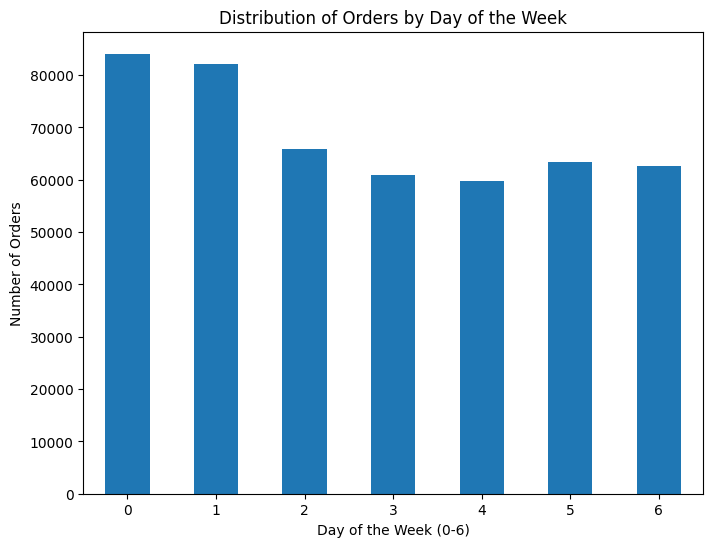

       order_id  user_id  order_number  order_dow  order_hour_of_day  \
2124     401544    80955            72          4                  2   
14847   1913472   138992            16          4                  2   
16116   2796392   154904            12          4                  2   
16471   2209130    72786             5          4                  2   
32120   2235095    89980            18          4                  2   

       days_since_prior_order  
2124                      2.0  
14847                     6.0  
16116                    13.0  
16471                    30.0  
32120                     7.0  
Number of orders placed on Wednesday at 2:00 AM: 114


In [7]:
duplicate_orders = orders[orders.duplicated()]

print(f"Number of duplicated rows in orders: {duplicate_orders.shape[0]}")
print(duplicate_orders)# Check for duplicated orders

import matplotlib.pyplot as plt

# Plot the distribution of orders by day of the week
orders_per_day = orders['order_dow'].value_counts().sort_index()

plt.figure(figsize=(8, 6))
orders_per_day.plot(kind='bar', rot=0)  # Rotates the x-axis labels
plt.title('Distribution of Orders by Day of the Week')
plt.xlabel('Day of the Week (0-6)')
plt.ylabel('Number of Orders')
plt.show()

# with saturdays and sundays being the busiest days to shop, based off the distribution I think saturday equals 0 so wednesday equals 4

# Filter for orders placed on Wednesday at 2:00 AM
wednesday_2am_orders = orders[(orders['order_dow'] == 4) & (orders['order_hour_of_day'] == 2)]  # Adjusted time to 2 AM

# Display the first few rows of the filtered DataFrame
print(wednesday_2am_orders.head())

# Show the number of orders placed on Wednesday at 2:00 AM
print(f"Number of orders placed on Wednesday at 2:00 AM: {wednesday_2am_orders.shape[0]}")


<div class="alert alert-block alert-warning"> <b>Reviewer's comment</b> <a 
class="tocSkip"></a>
All import should be done in the first cell</div>

In [8]:
#checking how many rows there is
original_row_count = orders.shape[0]

# Remove duplicate orders
orders = orders.drop_duplicates(subset='order_id')

cleaned_row_count = orders.shape[0]

duplicates_removed = original_row_count - cleaned_row_count

#checking that dupicate orders removed equals 15 since we confirmed appove there was 15 duplicate rows and confirming new count of rows
print(f"Number of duplicate rows removed: {duplicates_removed}")
print(f"Number of rows after removing duplicates: {orders.shape[0]}")


Number of duplicate rows removed: 15
Number of rows after removing duplicates: 478952


In [9]:
# Double check for duplicate rows
duplicate_orders = orders[orders.duplicated()]

print(f"Number of duplicated rows in orders: {duplicate_orders.shape[0]}")
print(duplicate_orders)


Number of duplicated rows in orders: 0
Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []


In [10]:
# Double check for duplicate order IDs only
duplicate_order_ids = orders[orders.duplicated(subset='order_id')]

print(f"Number of duplicate order IDs: {duplicate_order_ids.shape[0]}")
print(duplicate_order_ids)


Number of duplicate order IDs: 0
Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []


<div class="alert alert-block alert-warning"> <b>Reviewer's comment</b> <a 
class="tocSkip"></a>
Great But it is better to clean original dataframe from duplicates and overwrite it
    
    orders = order.drop_duplicates()


</div>

### `products` data frame

In [11]:
# Check for fully duplicate rows
duplicate_products = products[products.duplicated()]

# Print the number of fully duplicated rows and display them
print(f"Number of fully duplicated rows: {duplicate_products.shape[0]}")
print(duplicate_products)


Number of fully duplicated rows: 0
Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []


In [12]:
# Check for just duplicate product IDs
duplicate_product_ids = products[products.duplicated(subset='product_id')]

# Print the number of duplicate product IDs and display them
print(f"Number of duplicate product IDs: {duplicate_product_ids.shape[0]}")
print(duplicate_product_ids)


Number of duplicate product IDs: 0
Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []


In [13]:
# create a new column with product names in lowercase
products['product_name_lower'] = products['product_name'].str.lower()

# check for duplicates based on the lowercase product names
duplicate_product_names = products[products.duplicated(subset='product_name_lower')]

# print the number of duplicate product names and display them
print(f"Number of duplicate product names (case-insensitive): {duplicate_product_names.shape[0]}")
print(duplicate_product_names)


Number of duplicate product names (case-insensitive): 1361
       product_id                                     product_name  aisle_id  \
71             72                                              NaN       100   
109           110                                              NaN       100   
296           297                                              NaN       100   
416           417                                              NaN       100   
436           437                                              NaN       100   
...           ...                                              ...       ...   
49689       49690                    HIGH PERFORMANCE ENERGY DRINK        64   
49690       49691                    ORIGINAL PANCAKE & WAFFLE MIX       130   
49691       49692  ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR       130   
49692       49693                           SPRING WATER BODY WASH       127   
49693       49694                          BURRITO- STEAK & C

In [14]:
# check for duplicate product names that aren't missing
non_null_duplicate_names = products.dropna(subset=['product_name']).copy()

# convert product names to lowercase for better comparison
non_null_duplicate_names.loc[:, 'product_name_lower'] = non_null_duplicate_names['product_name'].str.lower()

# check for duplicates based on the lowercase product names
duplicate_non_null_names = non_null_duplicate_names[non_null_duplicate_names.duplicated(subset='product_name_lower')]

# print the number of non-null duplicate product names and display them
print(f"Number of non-null duplicate product names: {duplicate_non_null_names.shape[0]}")
print(duplicate_non_null_names)


Number of non-null duplicate product names: 104
       product_id                                     product_name  aisle_id  \
2058         2059                                  Biotin 1000 Mcg        47   
5455         5456                 Green Tea With Ginseng and Honey        96   
5558         5559                           Cream Of Mushroom Soup        69   
7558         7559                        Cinnamon Rolls with Icing       105   
9037         9038                           American Cheese slices        21   
...           ...                                              ...       ...   
49689       49690                    HIGH PERFORMANCE ENERGY DRINK        64   
49690       49691                    ORIGINAL PANCAKE & WAFFLE MIX       130   
49691       49692  ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR       130   
49692       49693                           SPRING WATER BODY WASH       127   
49693       49694                          BURRITO- STEAK & CHEESE      

<div class="alert alert-block alert-success"> <b>Reviewer's comment</b> <a 
class="tocSkip"></a>
Well done</div>

### `departments` data frame

In [15]:
# check for duplicate department IDs
duplicate_department_ids = departments[departments.duplicated(subset='department_id')]

# print the number of duplicate department IDs and display them
print(f"Number of duplicate department IDs: {duplicate_department_ids.shape[0]}")
print(duplicate_department_ids)

# with having no duplicate deciding there is no clean up to do

Number of duplicate department IDs: 0
Empty DataFrame
Columns: [department_id, department]
Index: []


In [16]:
# convert department names to lowercase and check for duplicates
departments['department_lower'] = departments['department'].str.lower()

# check for duplicate department names (case-insensitive)
duplicate_department_names = departments[departments.duplicated(subset='department_lower')]

# print the number of duplicate department names and display them
print(f"Number of duplicate department names: {duplicate_department_names.shape[0]}")
print(duplicate_department_names)

# with having no duplicate names deciding there is no clean up to do

Number of duplicate department names: 0
Empty DataFrame
Columns: [department_id, department, department_lower]
Index: []


<div class="alert alert-block alert-success"> <b>Reviewer's comment</b> <a 
class="tocSkip"></a>
Right</div>

### `aisles` data frame

In [17]:
# check for fully duplicate rows in the aisles DataFrame
duplicate_aisles = aisles[aisles.duplicated()]

# print the number of fully duplicated rows and display them
print(f"Number of fully duplicated rows: {duplicate_aisles.shape[0]}")
print(duplicate_aisles)

# with having no duplicate deciding there is no clean up to do

Number of fully duplicated rows: 0
Empty DataFrame
Columns: [aisle_id, aisle]
Index: []


In [18]:
# check for duplicate aisle IDs
duplicate_aisle_ids = aisles[aisles.duplicated(subset='aisle_id')]

# print the number of duplicate aisle IDs and display them
print(f"Number of duplicate aisle IDs: {duplicate_aisle_ids.shape[0]}")
print(duplicate_aisle_ids)

# convert aisle names to lowercase and check for duplicates
aisles['aisle_lower'] = aisles['aisle'].str.lower()

# check for duplicate aisle names (case-insensitive)
duplicate_aisle_names = aisles[aisles.duplicated(subset='aisle_lower')]

# print the number of duplicate aisle names and display them
print(f"Number of duplicate aisle names: {duplicate_aisle_names.shape[0]}")
print(duplicate_aisle_names)

# with having no duplicate ids or names deciding there is no clean up to do

Number of duplicate aisle IDs: 0
Empty DataFrame
Columns: [aisle_id, aisle]
Index: []
Number of duplicate aisle names: 0
Empty DataFrame
Columns: [aisle_id, aisle, aisle_lower]
Index: []


<div class="alert alert-block alert-success"> <b>Reviewer's comment</b> <a 
class="tocSkip"></a>
Correct </div>

### `order_products` data frame

In [19]:
# check for fully duplicate rows in the order_products DataFrame
duplicate_order_products = order_products[order_products.duplicated()]

# print the number of fully duplicated rows and display them
print(f"Number of fully duplicated rows: {duplicate_order_products.shape[0]}")
print(duplicate_order_products)


Number of fully duplicated rows: 0
Empty DataFrame
Columns: [order_id, product_id, add_to_cart_order, reordered]
Index: []


In [20]:
# Double check for any other tricky duplicates
# check for duplicate product entries in the same order (ignoring 'add_to_cart_order' and 'reordered')
tricky_duplicates = order_products[order_products.duplicated(subset=['order_id', 'product_id'])]

# Print the number of tricky duplicates and display them
print(f"Number of tricky duplicates (same product in the same order): {tricky_duplicates.shape[0]}")
print(tricky_duplicates)


Number of tricky duplicates (same product in the same order): 0
Empty DataFrame
Columns: [order_id, product_id, add_to_cart_order, reordered]
Index: []


<div class="alert alert-block alert-success"> <b>Reviewer's comment</b> <a 
class="tocSkip"></a>
Correct </div>

## Find and remove missing values


### `products` data frame

In [21]:
# inspect the products DataFrame
print(products.info())
print(products.isnull().sum())
print(products.head())

products['aisle_id'].value_counts().head()
products['department_id'].value_counts().head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   product_id          49694 non-null  int64 
 1   product_name        48436 non-null  object
 2   aisle_id            49694 non-null  int64 
 3   department_id       49694 non-null  int64 
 4   product_name_lower  48436 non-null  object
dtypes: int64(3), object(2)
memory usage: 1.9+ MB
None
product_id               0
product_name          1258
aisle_id                 0
department_id            0
product_name_lower    1258
dtype: int64
   product_id                                       product_name  aisle_id  \
0           1                         Chocolate Sandwich Cookies        61   
1           2                                   All-Seasons Salt       104   
2           3               Robust Golden Unsweetened Oolong Tea        94   
3           4  Smart Ones Classic Favorit

11    6564
19    6264
13    5372
7     4366
1     4008
Name: department_id, dtype: int64

In [22]:
# Are all of the missing product names associated with aisle ID 100?
# check for missing product names
missing_product_names = products[products['product_name'].isnull()]

# check if all missing product names are associated with aisle ID 100
aisle_100_missing_names = missing_product_names[missing_product_names['aisle_id'] == 100]

# print the result
print(f"Number of missing product names associated with aisle ID 100: {aisle_100_missing_names.shape[0]}")
print(aisle_100_missing_names)

# since the total for aisle id 100 equals total rows of missing product names concluding yes all missing product names are associated with aisle id 100

Number of missing product names associated with aisle ID 100: 1258
       product_id product_name  aisle_id  department_id product_name_lower
37             38          NaN       100             21                NaN
71             72          NaN       100             21                NaN
109           110          NaN       100             21                NaN
296           297          NaN       100             21                NaN
416           417          NaN       100             21                NaN
...           ...          ...       ...            ...                ...
49552       49553          NaN       100             21                NaN
49574       49575          NaN       100             21                NaN
49640       49641          NaN       100             21                NaN
49663       49664          NaN       100             21                NaN
49668       49669          NaN       100             21                NaN

[1258 rows x 5 columns]


<div class="alert alert-block alert-success"> <b>Reviewer's comment</b> <a 
class="tocSkip"></a>
Right conclusion</div>

In [23]:
# Are all of the missing product names associated with department ID 21?
# check if all missing product names are associated with department ID 21
dept_21_missing_names = missing_product_names[missing_product_names['department_id'] == 21]

# print the result
print(f"Number of missing product names associated with department ID 21: {dept_21_missing_names.shape[0]}")
print(dept_21_missing_names)

# since the total for department id 21 equals total rows of missing product names concluding yes all missing product names are associated with department id 21

Number of missing product names associated with department ID 21: 1258
       product_id product_name  aisle_id  department_id product_name_lower
37             38          NaN       100             21                NaN
71             72          NaN       100             21                NaN
109           110          NaN       100             21                NaN
296           297          NaN       100             21                NaN
416           417          NaN       100             21                NaN
...           ...          ...       ...            ...                ...
49552       49553          NaN       100             21                NaN
49574       49575          NaN       100             21                NaN
49640       49641          NaN       100             21                NaN
49663       49664          NaN       100             21                NaN
49668       49669          NaN       100             21                NaN

[1258 rows x 5 columns]


In [24]:
# What is this ailse and department?
# merge with the aisles DataFrame to get the aisle name
aisle_info = aisles[aisles['aisle_id'] == 100]

# merge with the departments DataFrame to get the department name
department_info = departments[departments['department_id'] == 21]

# print the aisle and department information
print(aisle_info)
print(department_info)

    aisle_id    aisle aisle_lower
99       100  missing     missing
    department_id department department_lower
20             21    missing          missing


In [25]:
# Fill missing product names with 'Unknown'
products['product_name'].fillna('Unknown', inplace=True)

# verify there are no more missing product names
print(f"Number of missing product names after filling: {products['product_name'].isnull().sum()}")

Number of missing product names after filling: 0


<div class="alert alert-block alert-success"> <b>Reviewer's comment</b> <a 
class="tocSkip"></a>
Great</div>

### `orders` data frame

In [26]:
# preview the first few rows of the orders DataFrame
print(orders.head())

# inspect the structure of the orders DataFrame
print(orders.info())
print(orders.describe())

# check for missing values in the orders DataFrame
print(orders.isnull().sum())

   order_id  user_id  order_number  order_dow  order_hour_of_day  \
0   1515936   183418            11          6                 13   
1   1690866   163593             5          5                 12   
2   1454967    39980             4          5                 19   
3   1768857    82516            56          0                 20   
4   3007858   196724             2          4                 12   

   days_since_prior_order  
0                    30.0  
1                     9.0  
2                     2.0  
3                    10.0  
4                    17.0  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 478952 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478952 non-null  int64  
 1   user_id                 478952 non-null  int64  
 2   order_number            478952 non-null  int64  
 3   order_dow               478952 non-nul

In [27]:
# Are there any missing values where it's not a customer's first order?
# filter for non-first orders (order_number > 1)
non_first_orders = orders[orders['order_number'] > 1]

# check if there are any missing values in 'days_since_prior_order' for non-first orders
missing_non_first_orders = non_first_orders[non_first_orders['days_since_prior_order'].isnull()]

# print the number of missing values and display the rows (if any)
print(f"Number of missing values where it's not the customer's first order: {missing_non_first_orders.shape[0]}")
print(missing_non_first_orders)


Number of missing values where it's not the customer's first order: 0
Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []


<div class="alert alert-block alert-success"> <b>Reviewer's comment</b> <a 
class="tocSkip"></a>
Perfect </div>

### `order_products` data frame

In [28]:
#  inspect the structure and data types of the order_products DataFrame
print(order_products.info())

# preview the first few rows of the DataFrame
print(order_products.head())

# check for missing values across all columns
print(order_products.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB
None
   order_id  product_id  add_to_cart_order  reordered
0   2141543       11440               17.0          0
1    567889        1560                1.0          1
2   2261212       26683                1.0          1
3    491251        8670               35.0          1
4   2571142        1940                5.0          1
order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64


In [29]:
# What are the min and max values in this column?

# check for min and max values in 'add_to_cart_order' column
min_value = order_products['add_to_cart_order'].min()
max_value = order_products['add_to_cart_order'].max()

# print result
print(f"Min value: {min_value}")
print(f"Max value: {max_value}")



Min value: 1.0
Max value: 64.0


In [30]:
# Save all order IDs with at least one missing value in 'add_to_cart_order'

# get all order IDs with at least one missing value in 'add_to_cart_order'
missing_add_to_cart_order = order_products[order_products['add_to_cart_order'].isnull()]

# save the order IDs with missing values
order_ids_with_missing_values = missing_add_to_cart_order['order_id'].unique()


# print result
print(f"Number of orders with missing values in 'add_to_cart_order': {len(order_ids_with_missing_values)}")
print(order_ids_with_missing_values)


Number of orders with missing values in 'add_to_cart_order': 70
[2449164 1968313 2926893 1717990 1959075  844733   61355  936852  264710
 1564093  129627  293169 2849370 1386261 3308010  903110 2136777 3347453
 1888628  165801 2094761 1038146 2997021  813364 2256933  171934 2409109
 1730767 1169835  733526  404157 3125735  747668 1800005 1961723  871281
  388234 1648217 1477139  102236 1021563 1832957 2721963  678116 1220886
 1673227 2999801 1633337 2470674 2625444 1677118 2479011 3383594 1183255
 1713430 2652650 1598369 1916118  854647 1302315  888470  180546 2621907
 1308785 2729254    9310 2170451 2979697 1625713 1529171]


In [31]:
# Do all orders with missing values have more than 64 products?

# identify all order_ids with missing 'add_to_cart_order' values
order_ids_with_missing_values = order_products[order_products['add_to_cart_order'].isna()]['order_id'].unique()

# filter order_products to keep only rows where order_id is in the list of order_ids_with_missing_values
filtered_orders = order_products[order_products['order_id'].isin(order_ids_with_missing_values)]

# group by order_id and count the number of products per order
orders_with_missing_values_count = filtered_orders.groupby('order_id').size()

# check if any of these orders have more than 64 products
orders_with_more_than_64 = orders_with_missing_values_count[orders_with_missing_values_count > 64]

# print the result
print(f"Number of orders with more than 64 products and missing 'add_to_cart_order': {orders_with_more_than_64.shape[0]}")
print(orders_with_more_than_64)

Number of orders with more than 64 products and missing 'add_to_cart_order': 70
order_id
9310        65
61355      127
102236      95
129627      69
165801      70
          ... 
2999801     70
3125735     86
3308010    115
3347453     71
3383594     69
Length: 70, dtype: int64


<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
~~Not correct To complete this task you need to leave in order_products all rows where order_id is in order_ids_with_missing_values After group by order_id and count products~~</div>

In [32]:
# Replace missing values with 999 and convert column to integer type

# replace missing values in 'add_to_cart_order' with 999
order_products['add_to_cart_order'].fillna(999, inplace=True)

# convert 'add_to_cart_order' column to integer type
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].astype(int)

# verify the changes
print(order_products.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 138.7 MB
None


# [A] Easy (must complete all to pass)

### [A1] Verify that the `'order_hour_of_day'` and `'order_dow'` values in the `orders` tables are sensible (i.e. `'order_hour_of_day'` ranges from 0 to 23 and `'order_dow'` ranges from 0 to 6)

In [33]:
# verify the range of 'order_hour_of_day'
min_order_hour = orders['order_hour_of_day'].min()
max_order_hour = orders['order_hour_of_day'].max()

# print result
print(f"Minimum value in 'order_hour_of_day': {min_order_hour}")
print(f"Maximum value in 'order_hour_of_day': {max_order_hour}")

# this is what was expected

Minimum value in 'order_hour_of_day': 0
Maximum value in 'order_hour_of_day': 23


In [34]:
# verify the range of 'order_dow'
min_order_dow = orders['order_dow'].min()
max_order_dow = orders['order_dow'].max()

# print result
print(f"Minimum value in 'order_dow': {min_order_dow}")
print(f"Maximum value in 'order_dow': {max_order_dow}")

# this is what was expected

Minimum value in 'order_dow': 0
Maximum value in 'order_dow': 6


<div class="alert alert-block alert-success"> <b>Reviewer's comment</b> <a 
class="tocSkip"></a>
Super </div>

### [A2] What time of day do people shop for groceries?

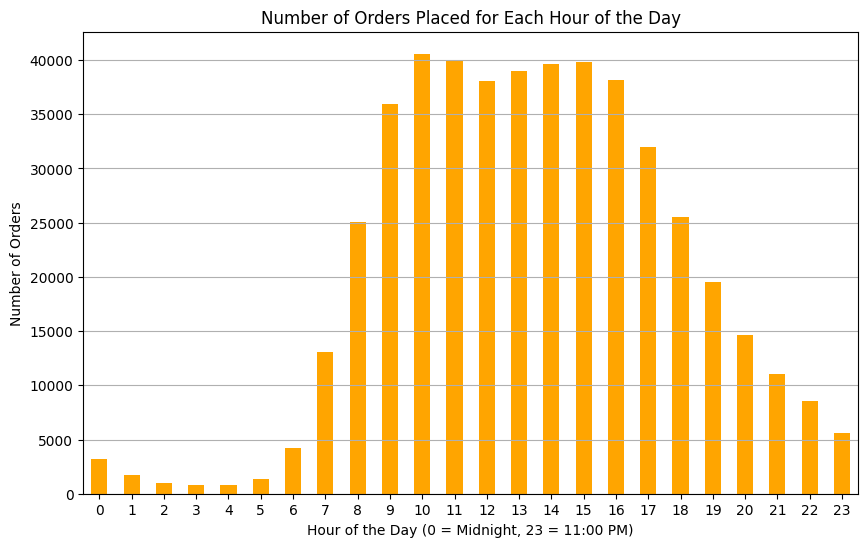

In [35]:
# Create a count of orders per hour of the day
orders_per_hour = orders['order_hour_of_day'].value_counts().sort_index()

# Create a plot showing the number of orders for each hour of the day
plt.figure(figsize=(10, 6))
orders_per_hour.plot(kind='bar', rot =0, color='orange')

# Add title and labels with more detailed descriptions
plt.title('Number of Orders Placed for Each Hour of the Day')
plt.xlabel('Hour of the Day (0 = Midnight, 23 = 11:00 PM)')
plt.ylabel('Number of Orders')

# Add gridlines for better readability
plt.grid(axis='y')

# Show the plot
plt.show()

<div class="alert alert-block alert-success"> <b>Reviewer's comment</b> <a 
class="tocSkip"></a>
Amazing visualization </div>

### [A3] What day of the week do people shop for groceries?

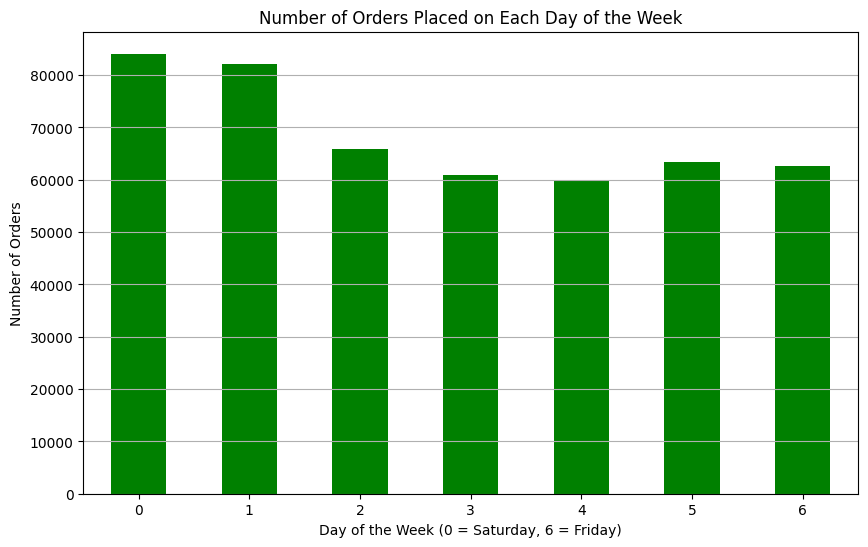

In [36]:
# Create a plot showing the number of orders for each day of the week

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
orders_per_day.plot(kind='bar', rot=0, color='green')

# add title and labels with more detailed descriptions
plt.title('Number of Orders Placed on Each Day of the Week')
plt.xlabel('Day of the Week (0 = Saturday, 6 = Friday)')
plt.ylabel('Number of Orders')

# add gridlines for better readability
plt.grid(axis='y')


# show the plot
plt.show()

<div class="alert alert-block alert-success"> <b>Reviewer's comment</b> <a 
class="tocSkip"></a>
Great </div>

### [A4] How long do people wait until placing another order?

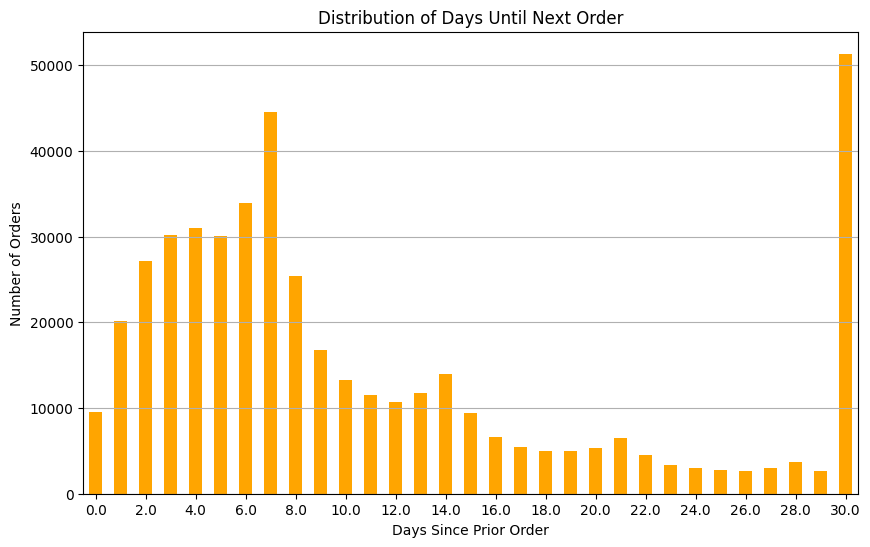

In [37]:
# Plot the distribution of 'days_since_prior_order'

import matplotlib.pyplot as plt

# Plot the distribution of 'days_since_prior_order'
plt.figure(figsize=(10, 6))
orders['days_since_prior_order'].value_counts().sort_index().plot(kind='bar', rot=0, color='orange')

# Add title and labels
plt.title('Distribution of Days Until Next Order')
plt.xlabel('Days Since Prior Order')
plt.ylabel('Number of Orders')

# Adjust x-axis ticks for better readability (show every 2nd or 5th tick)
plt.xticks(ticks=range(0, 31, 2))  # Here we show every 2nd day (you can adjust to every 5th or 7th if needed)

# Add gridlines for better readability
plt.grid(axis='y')

# Show the plot
plt.show()

<div class="alert alert-block alert-success"> <b>Reviewer's comment</b> <a 
class="tocSkip"></a>
Right </div>

In [38]:

# key insights from the plots:
#Order Times: Most orders are placed between 9 AM and 4 PM, with a peak around noon.
#Order Days: The busiest shopping days are Saturday and Sunday, while weekdays generally have fewer orders.
#Time Between Orders: Most customers place another order within 7 days, with another spike around 30 days, indicating regular weekly and monthly shopping habits.
# potential next steps:
#Investigate whether there are specific products or departments that are more popular on certain days of the week.
# Consider how reorder rates vary by different customer segments based on their shopping habits.

<div class="alert alert-block alert-success"> <b>Reviewer's comment</b> <a 
class="tocSkip"></a>
VEry nice conclusion</div>

# [B] Medium (must complete all to pass)

### [B1] Is there a difference in `'order_hour_of_day'` distributions on Wednesdays and Saturdays? Plot the histograms for both days and describe the differences that you see.

In [39]:
# filter data for Wednesdays (order_dow = 4) and Saturdays (order_dow = 0)
wednesday_orders = orders[orders['order_dow'] == 4]
saturday_orders = orders[orders['order_dow'] == 0]

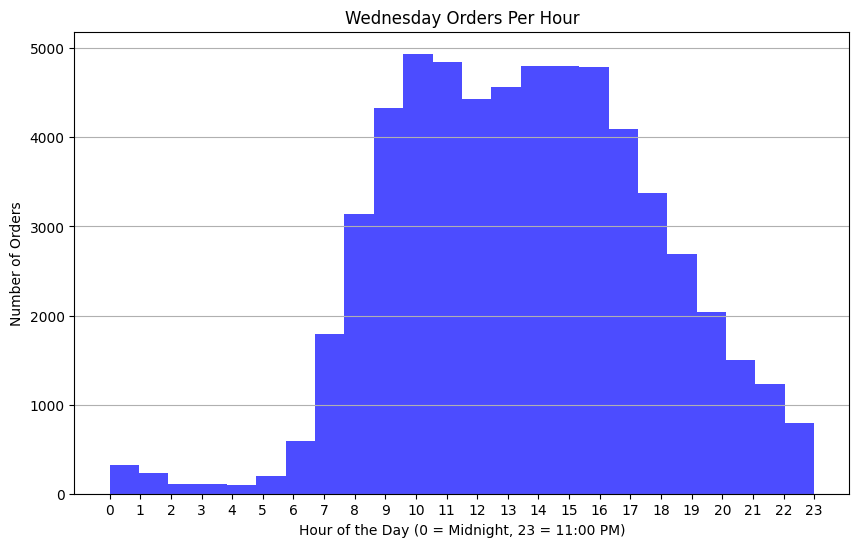

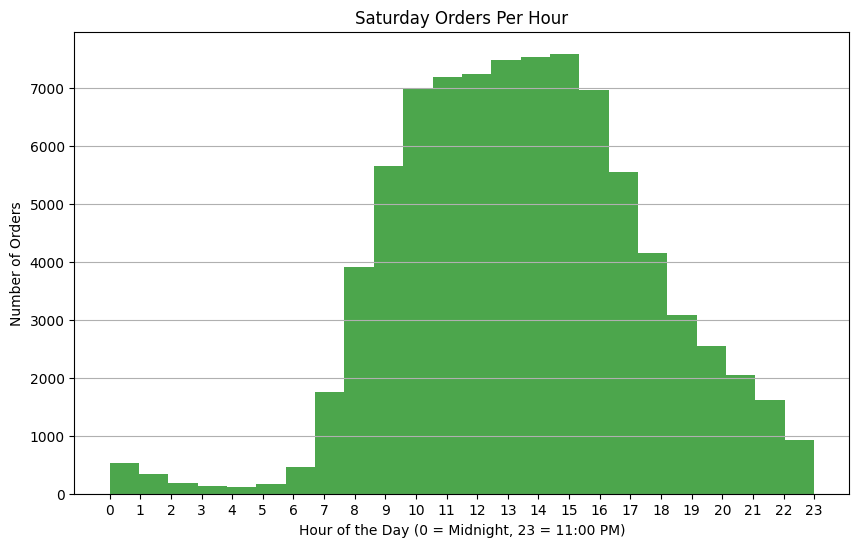

In [40]:
import matplotlib.pyplot as plt

# filter data for Wednesdays (order_dow = 4)
wednesday_orders = orders[orders['order_dow'] == 4]

# create the histogram for Wednesdays
plt.figure(figsize=(10, 6))
plt.hist(wednesday_orders['order_hour_of_day'], bins=24, alpha=0.7, label='Wednesday', color='blue')

# add title and labels
plt.title('Wednesday Orders Per Hour')
plt.xlabel('Hour of the Day (0 = Midnight, 23 = 11:00 PM)')
plt.ylabel('Number of Orders')

# add gridlines for better readability
plt.grid(axis='y')

# set x-axis ticks for each hour (0 to 23)
plt.xticks(ticks=range(0, 24))

# show the plot
plt.show()


# filter data for Saturdays (order_dow = 0)
saturday_orders = orders[orders['order_dow'] == 0]

# create the histogram for Saturdays
plt.figure(figsize=(10, 6))
plt.hist(saturday_orders['order_hour_of_day'], bins=24, alpha=0.7, label='Saturday', color='green')

# add title and labels
plt.title('Saturday Orders Per Hour')
plt.xlabel('Hour of the Day (0 = Midnight, 23 = 11:00 PM)')
plt.ylabel('Number of Orders')

# add gridlines for better readability
plt.grid(axis='y')

# set x-axis ticks for each hour (0 to 23)
plt.xticks(ticks=range(0, 24))

# show the plot
plt.show()

# Saturdays have a higher concentration of orders during the late morning to early afternoon, with a sharp peak around 11 AM to 12 PM.
# Wednesdays have a more spread-out distribution, with moderate peaks in both the late morning and late afternoon.
# The total volume of orders is higher on Saturdays, especially during peak hours.
# These differences reflect varying shopping habits based on the day of the week. On Saturdays, people tend to shop earlier and in larger numbers, while on Wednesdays, shopping is more evenly distributed throughout the day.

<div class="alert alert-block alert-warning"> <b>Reviewer's comment</b> <a 
class="tocSkip"></a>
Very nice But it is better to have 2 histogrames on the same visualization </div>

### [B2] What's the distribution for the number of orders per customer?

In [41]:
# group by 'user_id' and count the number of orders for each customer
orders_per_customer = orders.groupby('user_id')['order_id'].count()

# print summary
print(orders_per_customer.describe())

count    157437.000000
mean          3.042182
std           2.746842
min           1.000000
25%           1.000000
50%           2.000000
75%           4.000000
max          28.000000
Name: order_id, dtype: float64


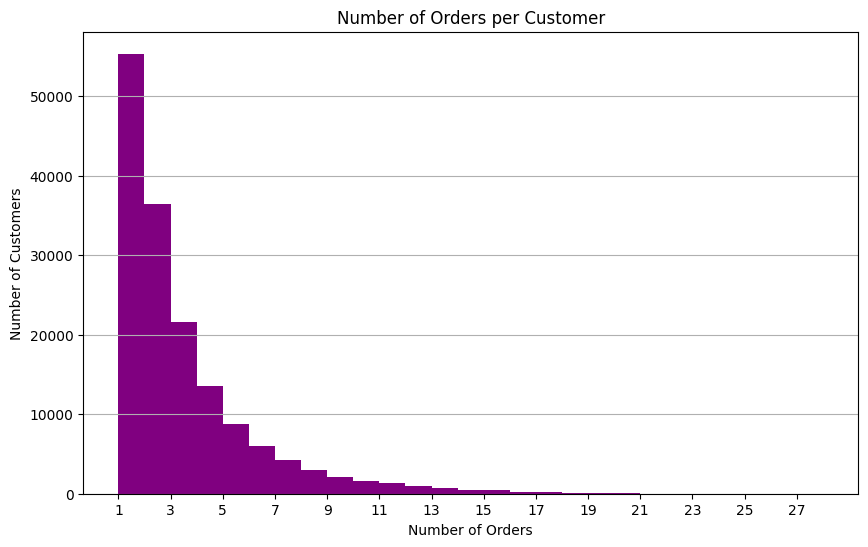

In [42]:
import matplotlib.pyplot as plt

# Define bins to group orders into smaller ranges (e.g., 1 order per bin)
bins = range(1, orders_per_customer.max() + 1)

# Create a histogram without a log scale but with more x-axis ticks
plt.figure(figsize=(10, 6))
plt.hist(orders_per_customer, bins=bins, color='purple')

# Add title and labels
plt.title('Number of Orders per Customer')
plt.xlabel('Number of Orders')
plt.ylabel('Number of Customers')

# Set x-axis ticks for every order count to improve readability
plt.xticks(ticks=range(1, orders_per_customer.max() + 1, 2))  # Adjust to skip fewer or more units (e.g., every 2 orders)

# Add gridlines for better readability
plt.grid(axis='y')

# Show the plot
plt.show()

<div class="alert alert-block alert-success"> <b>Reviewer's comment</b> <a 
class="tocSkip"></a>
Perfect</div>

### [B3] What are the top 20 popular products (display their id and name)?

In [43]:
import pandas as pd

# aggregate the number of times each product was ordered
product_order_counts = order_products['product_id'].value_counts().head(20)

# merge the top 20 products with the product names
top_20_products = pd.DataFrame(product_order_counts).reset_index()
top_20_products.columns = ['product_id', 'order_count']

# merge with the products DataFrame to get product names
top_20_products = top_20_products.merge(products[['product_id', 'product_name']], on='product_id', how='left')

# print the top 20 popular products
print(top_20_products[['product_id', 'product_name', 'order_count']])

    product_id              product_name  order_count
0        24852                    Banana        66050
1        13176    Bag of Organic Bananas        53297
2        21137      Organic Strawberries        37039
3        21903      Organic Baby Spinach        33971
4        47209      Organic Hass Avocado        29773
5        47766           Organic Avocado        24689
6        47626               Large Lemon        21495
7        16797              Strawberries        20018
8        26209                     Limes        19690
9        27845        Organic Whole Milk        19600
10       27966       Organic Raspberries        19197
11       22935      Organic Yellow Onion        15898
12       24964            Organic Garlic        15292
13       45007          Organic Zucchini        14584
14       39275       Organic Blueberries        13879
15       49683            Cucumber Kirby        13675
16       28204        Organic Fuji Apple        12544
17        5876             O

<div class="alert alert-block alert-success"> <b>Reviewer's comment</b> <a 
class="tocSkip"></a>
Right</div>

# [C] Hard (must complete at least two to pass)

### [C1] How many items do people typically buy in one order? What does the distribution look like?

count    450046.000000
mean         10.098983
std           7.540206
min           1.000000
25%           5.000000
50%           8.000000
75%          14.000000
max         127.000000
Name: product_id, dtype: float64


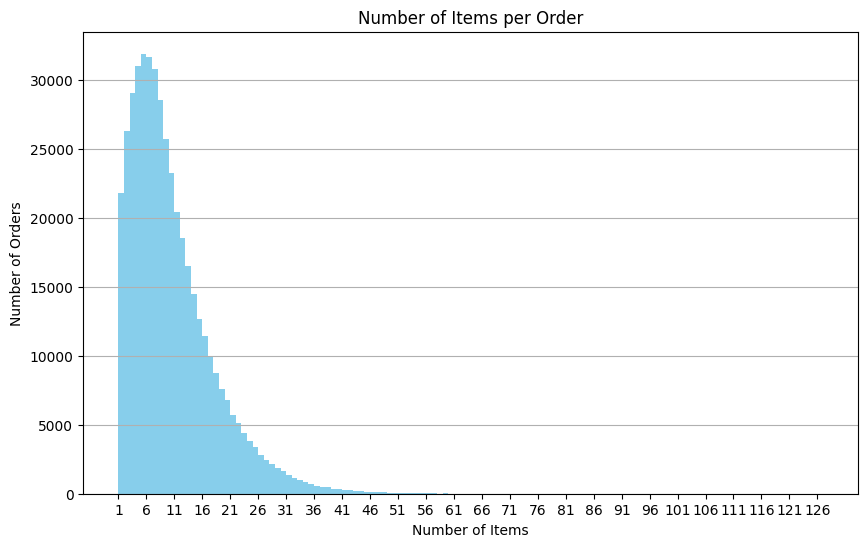

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# Count the number of items per order
items_per_order = order_products.groupby('order_id')['product_id'].count()

# Print summary statistics for the distribution
print(items_per_order.describe())

# Plot the distribution of the number of items per order
plt.figure(figsize=(10, 6))
plt.hist(items_per_order, bins=range(1, items_per_order.max()+1), color='skyblue')

# Add title and labels
plt.title('Number of Items per Order')
plt.xlabel('Number of Items')
plt.ylabel('Number of Orders')

# Add x-axis ticks to show every unit
plt.xticks(ticks=range(1, items_per_order.max() + 1, 5))  # Shows every other number on the x-axis

# Add gridlines for better readability
plt.grid(axis='y')

# Show the plot
plt.show()

<div class="alert alert-block alert-success"> <b>Reviewer's comment</b> <a 
class="tocSkip"></a>
Super</div>

### [C2] What are the top 20 items that are reordered most frequently (display their names and product IDs)?

In [45]:
import pandas as pd

# filter for reordered products (reordered == 1)
reordered_products = order_products[order_products['reordered'] == 1]

# aggregate the number of times each product was reordered
reordered_product_counts = reordered_products['product_id'].value_counts().head(20)

# convert to DataFrame and merge with product names
top_20_reordered = pd.DataFrame(reordered_product_counts).reset_index()
top_20_reordered.columns = ['product_id', 'reorder_count']

# merge with the products DataFrame to get product names
top_20_reordered = top_20_reordered.merge(products[['product_id', 'product_name']], on='product_id', how='left')

# print the top 20 most reordered products
print(top_20_reordered[['product_id', 'product_name', 'reorder_count']])

    product_id              product_name  reorder_count
0        24852                    Banana          55763
1        13176    Bag of Organic Bananas          44450
2        21137      Organic Strawberries          28639
3        21903      Organic Baby Spinach          26233
4        47209      Organic Hass Avocado          23629
5        47766           Organic Avocado          18743
6        27845        Organic Whole Milk          16251
7        47626               Large Lemon          15044
8        27966       Organic Raspberries          14748
9        16797              Strawberries          13945
10       26209                     Limes          13327
11       22935      Organic Yellow Onion          11145
12       24964            Organic Garlic          10411
13       45007          Organic Zucchini          10076
14       49683            Cucumber Kirby           9538
15       28204        Organic Fuji Apple           8989
16        8277  Apple Honeycrisp Organic        

<div class="alert alert-block alert-success"> <b>Reviewer's comment</b> <a 
class="tocSkip"></a>
Correct</div>

### [C3] For each product, what proportion of its orders are reorders?

In [46]:
import pandas as pd

# group by 'product_id' and calculate total orders and reorders
product_reorder_stats = order_products.groupby('product_id').agg(
    total_orders=('order_id', 'count'),
    total_reorders=('reordered', 'sum')
)

# calculate the proportion of reorders for each product
product_reorder_stats['reorder_proportion'] = product_reorder_stats['total_reorders'] / product_reorder_stats['total_orders']

# merge with the products DataFrame to get the product names
product_reorder_stats = product_reorder_stats.merge(products[['product_id', 'product_name']], on='product_id')

# print results (product ID, product name, and reorder proportion)
print(product_reorder_stats[['product_id', 'product_name', 'reorder_proportion']].head(20))

    product_id                                       product_name  \
0            1                         Chocolate Sandwich Cookies   
1            2                                   All-Seasons Salt   
2            3               Robust Golden Unsweetened Oolong Tea   
3            4  Smart Ones Classic Favorites Mini Rigatoni Wit...   
4            7                     Pure Coconut Water With Orange   
5            8                  Cut Russet Potatoes Steam N' Mash   
6            9                  Light Strawberry Blueberry Yogurt   
7           10     Sparkling Orange Juice & Prickly Pear Beverage   
8           11                                  Peach Mango Juice   
9           12                         Chocolate Fudge Layer Cake   
10          13                                  Saline Nasal Mist   
11          14                     Fresh Scent Dishwasher Cleaner   
12          17                                  Rendered Duck Fat   
13          18                Pizz

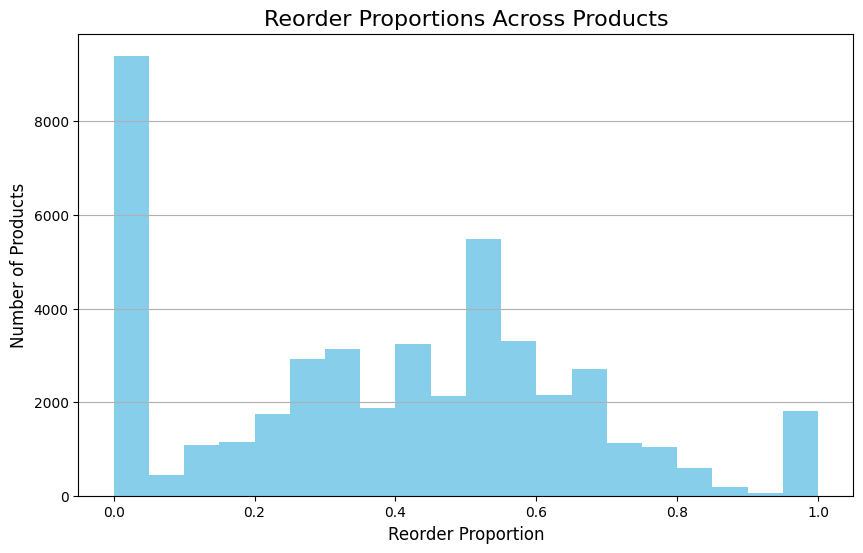

In [47]:
import matplotlib.pyplot as plt

# calculate reorder proportions (from previous code)
product_reorder_stats['reorder_proportion'] = product_reorder_stats['total_reorders'] / product_reorder_stats['total_orders']

# create a histogram of the reorder proportions
plt.figure(figsize=(10, 6))
plt.hist(product_reorder_stats['reorder_proportion'], bins=20, color='skyblue')

# Add title and labels
plt.title('Reorder Proportions Across Products', fontsize=16)
plt.xlabel('Reorder Proportion', fontsize=12)
plt.ylabel('Number of Products', fontsize=12)

# add gridlines for better readability
plt.grid(axis='y')

# show the plot
plt.show()

<div class="alert alert-block alert-success"> <b>Reviewer's comment</b> <a 
class="tocSkip"></a>
Well done</div>

### [C4] For each customer, what proportion of their products ordered are reorders?

### [C5] What are the top 20 items that people put in their carts first? 